# GTA 666 : NLP & Sentiment Analysis

Scenario: You are working on a Data team at Rockstar Labs. A stakeholder from R&D has a request of trying to understand user feedback to determine any new features or upgrades the upcoming GTA 666 game should have.

1) Who is our community, what are their demographics & distribution of gamers Method to Use : Exploratory Data Analysis (EDA)

2)What are these people saying ? What is the most common request ? Method to use: Natural Language Processing Techniques

3)Determine the sentiment of the comment (are the positive? Are they negative ?) Method to use: Sentiment Analysis

In [ ]:
## Import necessary packages
import pandas as pd
import numpy as np
import re
import nltk
import string
##from nltk.corpus import stopwords
##pip install pandas nltk textblob matplotlib

In [ ]:
## Import Dataset , make sure upload your csv file in google colab first, then right click file to copy path
##from google.colab import files
##uploaded = files.upload()
df= pd.read_csv('/content/GTA666_subset.csv')

## Exploritory Data Analysis (EDA)

In [ ]:
# look at uploaded dataset top 10 rows

df.head(10)



,Timestamp,Name,Email,Age,Address,Phone Number,Comment
0,12/18/2023 21:17:05,jeb bush,NaN,NaN,NaN,NaN,fuck you and this gameee
1,NaN,Heather Savage,alvarezerin@gmail.com,25.0,"1451 Rita Shore\nJohnchester, MT 99947",+1-544-954-3691x582,Seeking stronger storylines in games
2,NaN,Ann Gay,rebeccafleming@wilson.com,54.0,"2241 Fischer Rest Apt. 195\nNorth Rhondamouth,...",001-526-355-5715,Need better multiplayer support
3,NaN,Rachel Parks,montoyashelley@gmail.com,55.0,"9143 James Dale\nTammiechester, GA 96987",+1-884-013-8714,Seeking stronger storylines in games
4,NaN,Penny Avila,nathan15@gmail.com,60.0,"3267 Nicole Spur\nAshleyside, MD 04582",+1-108-431-8484x20444,Asking for more frequent updates
5,NaN,Todd Cobb,janet82@robinson.com,65.0,"0037 Matthew Course Suite 643\nMillsborough, M...",2177347478,More customizable characters
6,NaN,Charles Burns,annette97@gmail.com,45.0,"2140 John Valley Suite 470\nWest Jenniferfurt,...",538-517-8315x83296,Asking for more frequent updates
7,NaN,Justin Prince,michael12@burke.info,69.0,"2893 Lewis Ports Apt. 546\nPort Rebecca, MD 84050",505.450.7707x14797,Interested in cross-platform play
8,NaN,Brandon Clark,woodardronald@hotmail.com,54.0,"483 Francisco Unions\nNew Steven, DE 39669",(768)466-8295,Interested in cross-platform play
9,NaN,Jessica Long,meganpayne@hotmail.com,33.0,"242 John View\nNorth Karen, CO 54182",5576057573,More customizable characters


In [ ]:
#look at bottom 10 rows
df.tail(10)

,Timestamp,Name,Email,Age,Address,Phone Number,Comment
9991,NaN,Caleb Holmes,susanjuarez@wagner.org,27.0,15883 Jeremy Crossroad Apt. 468\nNew Elizabeth...,(398)211-3849,Hoping for virtual reality compatibility
9992,NaN,Kelly Morales,clarkdeborah@taylor-chase.com,43.0,"5292 William Lakes\nWest Clayton, WI 33213",+1-611-092-7302x20276,More customizable characters
9993,NaN,Lisa Gibson,jacob68@huber-jones.com,29.0,"374 Robert Fields\nEast Olivia, CO 62218",291.220.9386x680,Interested in cross-platform play
9994,NaN,Holly Medina,pattonrichard@yahoo.com,34.0,"4539 Stacy Mountain\nEricahaven, LA 74071",(845)468-3227,Looking for diverse game worlds
9995,NaN,Jeffrey Pratt,vfischer@mills.com,64.0,"66443 Ramirez Plaza\nNorth Joshuaville, OK 65641",820-619-8771x009,Seeking stronger storylines in games
9996,NaN,Erika Whitaker,anthony19@smith.com,46.0,"7664 Vanessa Orchard\nNew Ryan, NH 08984",640.556.1730,Interested in cross-platform play
9997,NaN,Kevin Stewart,crogers@powell-nolan.com,34.0,"0322 Lisa Lodge Apt. 232\nKeithbury, CA 24063",710-970-8276x07475,Asking for more frequent updates
9998,NaN,Thomas Morgan,brandonbrown@yahoo.com,35.0,"11539 Stevens Inlet\nSouth Darrellview, CO 22556",552.360.4764,Hoping for virtual reality compatibility
9999,NaN,Susan Morgan,maloneshelby@hotmail.com,45.0,"18443 Joshua Key Suite 810\nPort Aaron, WI 21370",001-292-940-2453,Desire for more strategic gameplay
10000,NaN,Robert Carlson,mcmillanstacey@yahoo.com,NaN,"15570 Wilson Vista Apt. 958\nPort Danielle, UT...",(169)629-3771x350,Interested in cross-platform play


In [ ]:
#lets check the data types of each column
print(df.dtypes)

Timestamp        object
Name             object
Email            object
Age             float64
Address          object
Phone Number     object
Comment          object
dtype: object


In [ ]:
#lets change the type from object to string for the columns that are necessary & check
df['Name'] = df['Name'].astype('string')
df['Email'] = df['Email'].astype('string')
df['Address'] = df['Address'].astype('string')
df['Phone Number'] = df['Phone Number'].astype('string')
df['Comment'] = df['Comment'].astype('string')

df['Zip_Code'] = df['Address'].str[-5:]
df.head(1000)

,Timestamp,Name,Email,Age,Address,Phone Number,Comment,Zip_Code
0,12/18/2023 21:17:05,jeb bush,<NA>,NaN,<NA>,<NA>,fuck you and this gameee,<NA>
1,NaN,Heather Savage,alvarezerin@gmail.com,25.0,"1451 Rita Shore Johnchester, MT 99947",+1-544-954-3691x582,Seeking stronger storylines in games,99947
2,NaN,Ann Gay,rebeccafleming@wilson.com,54.0,"2241 Fischer Rest Apt. 195 North Rhondamouth, ...",001-526-355-5715,Need better multiplayer support,94239
3,NaN,Rachel Parks,montoyashelley@gmail.com,55.0,"9143 James Dale Tammiechester, GA 96987",+1-884-013-8714,Seeking stronger storylines in games,96987
4,NaN,Penny Avila,nathan15@gmail.com,60.0,"3267 Nicole Spur Ashleyside, MD 04582",+1-108-431-8484x20444,Asking for more frequent updates,04582
...,...,...,...,...,...,...,...,...
995,NaN,Michael Leblanc,kevin88@hotmail.com,36.0,"184 Evans Points Apt. 402 Johnview, MD 29376",(102)850-2519,Interested in cross-platform play,29376
996,NaN,Richard Fisher,hansenjade@cole.org,68.0,"1839 Miller Squares Hardyhaven, NJ 65657",(519)815-3149,Asking for more frequent updates,65657
997,NaN,Justin Bright,stevensjeremy@gmail.com,21.0,"9660 White Hills New Morganchester, NC 82367",+1-256-015-9150,Desire for more strategic gameplay,82367
998,NaN,Kevin Williams,marshallmartin@yahoo.com,59.0,"14359 Andrews Vista Apt. 749 Gutierrezmouth, C...",903.456.3121x016,More customizable characters,84355


In [ ]:
#check how many rows we have

num_rows = len(df)
print(num_rows)

10001


In [ ]:
# summary statistics of dataset

df.describe()

,Age
count,9999.000000
mean,43.939694
std,15.372336
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,70.000000


In [ ]:
# Summary statistics for numeric columns
print("Summary Statistics for Age:")
print(df['Age'].describe())

Summary Statistics for Age:
count    9999.000000
mean       43.939694
std        15.372336
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


In [ ]:
# Count of unique values in each demographic column
print("\nUnique Values in Demographics:")
print("Unique Names:", df['Name'].nunique())
print("Unique Emails:", df['Email'].nunique())
print("Unique Addresses:", df['Address'].nunique())
print("Unique Phone Numbers:", df['Phone Number'].nunique())



Unique Values in Demographics:
Unique Names: 9404
Unique Emails: 9951
Unique Addresses: 10000
Unique Phone Numbers: 10000


In [ ]:
#Checking for missing values
df.isnull().sum()

Timestamp       10000
Name                0
Email               1
Age                 2
Address             1
Phone Number        1
Comment             0
Zip_Code            1
dtype: int64

In [ ]:
#Drop Collumn
df = df.drop('Timestamp', axis=1)


In [ ]:
df.head(10)

,Name,Email,Age,Address,Phone Number,Comment,Zip_Code
0,jeb bush,<NA>,NaN,<NA>,<NA>,fuck you and this gameee,<NA>
1,Heather Savage,alvarezerin@gmail.com,25.0,"1451 Rita Shore Johnchester, MT 99947",+1-544-954-3691x582,Seeking stronger storylines in games,99947
2,Ann Gay,rebeccafleming@wilson.com,54.0,"2241 Fischer Rest Apt. 195 North Rhondamouth, ...",001-526-355-5715,Need better multiplayer support,94239
3,Rachel Parks,montoyashelley@gmail.com,55.0,"9143 James Dale Tammiechester, GA 96987",+1-884-013-8714,Seeking stronger storylines in games,96987
4,Penny Avila,nathan15@gmail.com,60.0,"3267 Nicole Spur Ashleyside, MD 04582",+1-108-431-8484x20444,Asking for more frequent updates,04582
5,Todd Cobb,janet82@robinson.com,65.0,"0037 Matthew Course Suite 643 Millsborough, MD...",2177347478,More customizable characters,51753
6,Charles Burns,annette97@gmail.com,45.0,"2140 John Valley Suite 470 West Jenniferfurt, ...",538-517-8315x83296,Asking for more frequent updates,50296
7,Justin Prince,michael12@burke.info,69.0,"2893 Lewis Ports Apt. 546 Port Rebecca, MD 84050",505.450.7707x14797,Interested in cross-platform play,84050
8,Brandon Clark,woodardronald@hotmail.com,54.0,"483 Francisco Unions New Steven, DE 39669",(768)466-8295,Interested in cross-platform play,39669
9,Jessica Long,meganpayne@hotmail.com,33.0,"242 John View North Karen, CO 54182",5576057573,More customizable characters,54182


In [ ]:
#Dropping rows with NaN (null), saving as a new "cleaned" dataset, and checking that the operation worked
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

Name            0
Email           0
Age             0
Address         0
Phone Number    0
Comment         0
Zip_Code        0
dtype: int64

In [ ]:
df_cleaned.head(20)

,Name,Email,Age,Address,Phone Number,Comment,Zip_Code
1,Heather Savage,alvarezerin@gmail.com,25.0,"1451 Rita Shore Johnchester, MT 99947",+1-544-954-3691x582,Seeking stronger storylines in games,99947
2,Ann Gay,rebeccafleming@wilson.com,54.0,"2241 Fischer Rest Apt. 195 North Rhondamouth, ...",001-526-355-5715,Need better multiplayer support,94239
3,Rachel Parks,montoyashelley@gmail.com,55.0,"9143 James Dale Tammiechester, GA 96987",+1-884-013-8714,Seeking stronger storylines in games,96987
4,Penny Avila,nathan15@gmail.com,60.0,"3267 Nicole Spur Ashleyside, MD 04582",+1-108-431-8484x20444,Asking for more frequent updates,04582
5,Todd Cobb,janet82@robinson.com,65.0,"0037 Matthew Course Suite 643 Millsborough, MD...",2177347478,More customizable characters,51753
6,Charles Burns,annette97@gmail.com,45.0,"2140 John Valley Suite 470 West Jenniferfurt, ...",538-517-8315x83296,Asking for more frequent updates,50296
7,Justin Prince,michael12@burke.info,69.0,"2893 Lewis Ports Apt. 546 Port Rebecca, MD 84050",505.450.7707x14797,Interested in cross-platform play,84050
8,Brandon Clark,woodardronald@hotmail.com,54.0,"483 Francisco Unions New Steven, DE 39669",(768)466-8295,Interested in cross-platform play,39669
9,Jessica Long,meganpayne@hotmail.com,33.0,"242 John View North Karen, CO 54182",5576057573,More customizable characters,54182
10,Erik Bowers,tiffanycooke@carter-rogers.net,24.0,"7457 Orr Pine West Reneetown, NY 69152",023.778.5618,Desire for more strategic gameplay,69152


In [ ]:
#Let's create a new column called "Domain" which will show what email domain a person is using

df_cleaned['Domain'] = df_cleaned['Email'].apply(lambda x: x.split('@')[1])
df_cleaned.head(10)

<ipython-input-16-dd892369ff13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Domain'] = df_cleaned['Email'].apply(lambda x: x.split('@')[1])


,Name,Email,Age,Address,Phone Number,Comment,Zip_Code,Domain
1,Heather Savage,alvarezerin@gmail.com,25.0,"1451 Rita Shore Johnchester, MT 99947",+1-544-954-3691x582,Seeking stronger storylines in games,99947,gmail.com
2,Ann Gay,rebeccafleming@wilson.com,54.0,"2241 Fischer Rest Apt. 195 North Rhondamouth, ...",001-526-355-5715,Need better multiplayer support,94239,wilson.com
3,Rachel Parks,montoyashelley@gmail.com,55.0,"9143 James Dale Tammiechester, GA 96987",+1-884-013-8714,Seeking stronger storylines in games,96987,gmail.com
4,Penny Avila,nathan15@gmail.com,60.0,"3267 Nicole Spur Ashleyside, MD 04582",+1-108-431-8484x20444,Asking for more frequent updates,04582,gmail.com
5,Todd Cobb,janet82@robinson.com,65.0,"0037 Matthew Course Suite 643 Millsborough, MD...",2177347478,More customizable characters,51753,robinson.com
6,Charles Burns,annette97@gmail.com,45.0,"2140 John Valley Suite 470 West Jenniferfurt, ...",538-517-8315x83296,Asking for more frequent updates,50296,gmail.com
7,Justin Prince,michael12@burke.info,69.0,"2893 Lewis Ports Apt. 546 Port Rebecca, MD 84050",505.450.7707x14797,Interested in cross-platform play,84050,burke.info
8,Brandon Clark,woodardronald@hotmail.com,54.0,"483 Francisco Unions New Steven, DE 39669",(768)466-8295,Interested in cross-platform play,39669,hotmail.com
9,Jessica Long,meganpayne@hotmail.com,33.0,"242 John View North Karen, CO 54182",5576057573,More customizable characters,54182,hotmail.com
10,Erik Bowers,tiffanycooke@carter-rogers.net,24.0,"7457 Orr Pine West Reneetown, NY 69152",023.778.5618,Desire for more strategic gameplay,69152,carter-rogers.net


## EDA Visualizations

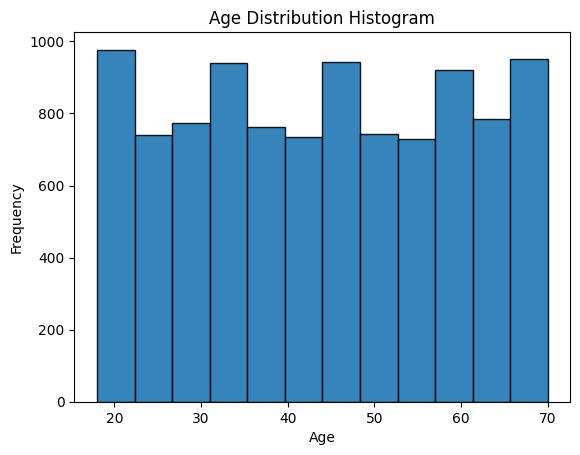

In [ ]:
#plotting Age
import matplotlib.pyplot as plt
plt.hist(df_cleaned['Age'], bins=12, edgecolor='k', alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.grid(False)
plt.show()

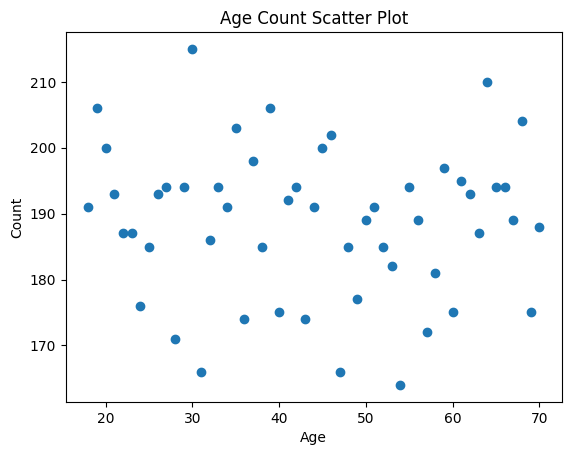

In [ ]:
#create scatter plot of age
age_counts = df_cleaned['Age'].value_counts()

# Creating a scatter plot
plt.scatter(age_counts.index, age_counts.values)
plt.title('Age Count Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

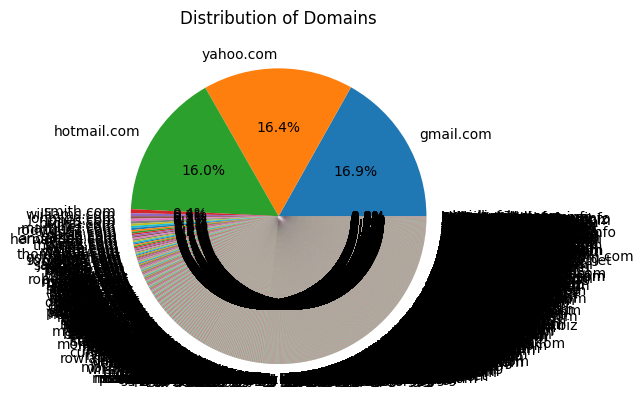

In [ ]:
# Let's find out what the most common email domain is

# Counting occurrences of each domain
domain_counts = df_cleaned['Domain'].value_counts()

# Creating a pie chart
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Domains')
plt.show()

In [ ]:
column_description = df_cleaned['Domain'].describe()
print(column_description)

##Tokenization

Text preprocessing is essential to clean and prepare the text data for analysis. For this step we will apply the following:
a. Removing Punctuation:

1.   Remove any special characters and punctuation marks from the Comment column
2.   Lowercasing: Convert all text to lowercase to ensure consistency.
3.   Removing Stopwords: Remove common stopwords (e.g., 'the', 'and', 'in') that don't carry much meaning.





In [ ]:
# imports needed for NLP
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Here we are creating a function that is removing punctuation, then lowercasing words, then removing stop words

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Creating a new column in our data set called 'Comment_Clean' which represent the tokenized and processed text
df_cleaned['Comment_Clean'] = df_cleaned['Comment'].apply(preprocess_text)

<ipython-input-21-57b5fedee593>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Comment_Clean'] = df_cleaned['Comment'].apply(preprocess_text)


In [ ]:
#check to verfiy above steps worked correctly
df_cleaned.head(10)

,Name,Email,Age,Address,Phone Number,Comment,Zip_Code,Domain,Comment_Clean
1,Heather Savage,alvarezerin@gmail.com,25.0,"1451 Rita Shore Johnchester, MT 99947",+1-544-954-3691x582,Seeking stronger storylines in games,99947,gmail.com,seeking stronger storylines games
2,Ann Gay,rebeccafleming@wilson.com,54.0,"2241 Fischer Rest Apt. 195 North Rhondamouth, ...",001-526-355-5715,Need better multiplayer support,94239,wilson.com,need better multiplayer support
3,Rachel Parks,montoyashelley@gmail.com,55.0,"9143 James Dale Tammiechester, GA 96987",+1-884-013-8714,Seeking stronger storylines in games,96987,gmail.com,seeking stronger storylines games
4,Penny Avila,nathan15@gmail.com,60.0,"3267 Nicole Spur Ashleyside, MD 04582",+1-108-431-8484x20444,Asking for more frequent updates,04582,gmail.com,asking frequent updates
5,Todd Cobb,janet82@robinson.com,65.0,"0037 Matthew Course Suite 643 Millsborough, MD...",2177347478,More customizable characters,51753,robinson.com,customizable characters
6,Charles Burns,annette97@gmail.com,45.0,"2140 John Valley Suite 470 West Jenniferfurt, ...",538-517-8315x83296,Asking for more frequent updates,50296,gmail.com,asking frequent updates
7,Justin Prince,michael12@burke.info,69.0,"2893 Lewis Ports Apt. 546 Port Rebecca, MD 84050",505.450.7707x14797,Interested in cross-platform play,84050,burke.info,interested crossplatform play
8,Brandon Clark,woodardronald@hotmail.com,54.0,"483 Francisco Unions New Steven, DE 39669",(768)466-8295,Interested in cross-platform play,39669,hotmail.com,interested crossplatform play
9,Jessica Long,meganpayne@hotmail.com,33.0,"242 John View North Karen, CO 54182",5576057573,More customizable characters,54182,hotmail.com,customizable characters
10,Erik Bowers,tiffanycooke@carter-rogers.net,24.0,"7457 Orr Pine West Reneetown, NY 69152",023.778.5618,Desire for more strategic gameplay,69152,carter-rogers.net,desire strategic gameplay


In [ ]:
# Here we will create a frequency count of the most common words

from nltk import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize the 'comment_clean' column and compute word frequencies
word_frequencies = FreqDist(word_tokenize(' '.join(df_cleaned['Comment_Clean'])))

# Display the word frequencies
print("Word Frequencies:")
for word, frequency in word_frequencies.items():
    print(f"{word}: {frequency}")

Word Frequencies:
seeking: 1006
stronger: 1006
storylines: 1006
games: 1006
need: 998
better: 998
multiplayer: 998
support: 998
asking: 980
frequent: 980
updates: 980
customizable: 993
characters: 993
interested: 990
crossplatform: 990
play: 990
desire: 999
strategic: 999
gameplay: 999
wish: 1021
realistic: 1021
graphics: 1021
want: 1011
levels: 1011
challenges: 1011
hoping: 1023
virtual: 1023
reality: 1023
compatibility: 1023
looking: 978
diverse: 978
game: 978
worlds: 978


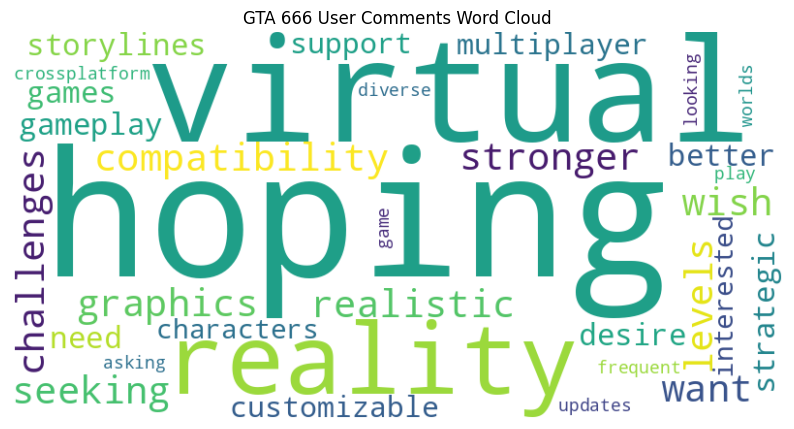

In [ ]:
# visualize word frequency
from wordcloud import WordCloud
import  matplotlib.pyplot as plt




# Tokenize the 'Comment_Clean' column and compute word frequencies
words = word_tokenize(' '.join(df_cleaned['Comment_Clean']))
word_frequencies = FreqDist(words)

# Create a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("GTA 666 User Comments Word Cloud")
plt.show()



In [ ]:
# Create a DataFrame from the word frequencies
df_word_count = pd.DataFrame({'Word': list(word_frequencies.keys()), 'Word_Count': list(word_frequencies.values())})

df_word_count.head(10)


,Word,Word_Count
0,seeking,1006
1,stronger,1006
2,storylines,1006
3,games,1006
4,need,998
5,better,998
6,multiplayer,998
7,support,998
8,asking,980
9,frequent,980


##Sentiment Analysis

<ipython-input-26-61a585832eab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = df_cleaned['Comment_Clean'].apply(analyze_sentiment)


Sentiment Distribution:
Neutral     5032
Positive    3989
Negative     978
Name: sentiment, dtype: int64


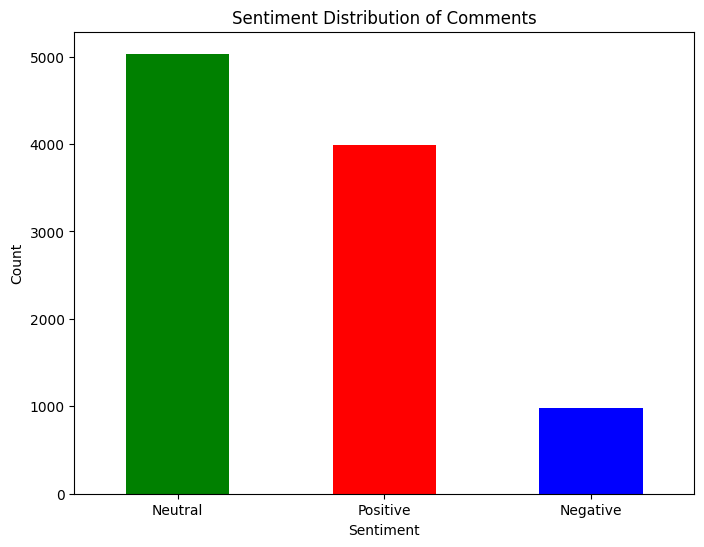

In [ ]:
from textblob import TextBlob

# Load your DataFrame with tokenized and cleaned text (assuming it's already loaded as 'df')

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Assign sentiment labels based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'comment_clean' column and store results in a new column
df_cleaned['sentiment'] = df_cleaned['Comment_Clean'].apply(analyze_sentiment)

# Count the sentiment categories
sentiment_counts = df_cleaned['sentiment'].value_counts()

# Print sentiment distribution
print("Sentiment Distribution:")
print(sentiment_counts)

# You can also visualize the sentiment distribution using libraries like Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()